<a href="https://colab.research.google.com/github/Daniel-de-Jesus/Stock-Price-/blob/main/TrabalhodecienciadedadosStockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cabecalho

import pandas as pd
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_magalu3= pd.read_csv('/content/drive/MyDrive/MGLU3.SA.csv')
df_dolar= pd.read_csv('/content/drive/MyDrive/BRL=X.csv')

In [ ]:
df_dolar.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.0
mean,4.369757,4.397516,4.341812,4.370452,4.370452,0.0
std,0.890950,0.899520,0.880265,0.890596,0.890596,0.0
min,3.088500,3.097200,3.071800,3.095600,3.095600,0.0
25%,3.710400,3.728000,3.685600,3.710900,3.710900,0.0
50%,4.090400,4.115100,4.073200,4.093200,4.093200,0.0
75%,5.290100,5.320600,5.249970,5.290500,5.290500,0.0
max,5.886300,5.966484,5.882761,5.886400,5.886400,0.0


In [ ]:
df_dolar.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df_magalu3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1.243000e+03
mean,10.142411,10.347453,9.917094,10.125860,10.020525,5.187122e+07
std,7.835271,7.969761,7.682529,7.824037,7.844736,3.697907e+07
min,0.679687,0.710937,0.660156,0.671914,0.641302,0.000000e+00
25%,3.698437,3.794531,3.622500,3.717187,3.596264,2.961300e+07
50%,6.680000,6.902187,6.469687,6.660000,6.660000,4.127450e+07
75%,16.682500,16.987499,16.173750,16.595000,16.595000,6.088480e+07
max,28.150000,28.309999,26.740000,27.450001,27.401571,3.612832e+08


In [ ]:
df_magalu3.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df_magalu3['Date'].unique()

array(['2017-03-31', '2017-04-03', '2017-04-04', ..., '2022-03-28',
       '2022-03-29', '2022-03-30'], dtype=object)

In [ ]:
df_dolar['Date']=pd.to_datetime(df_dolar['Date'])
df_magalu3['Date']=pd.to_datetime(df_magalu3['Date'])
df_magalu3['Date']

0      2017-03-31
1      2017-04-03
2      2017-04-04
3      2017-04-05
4      2017-04-06
          ...    
1238   2022-03-24
1239   2022-03-25
1240   2022-03-28
1241   2022-03-29
1242   2022-03-30
Name: Date, Length: 1243, dtype: datetime64[ns]

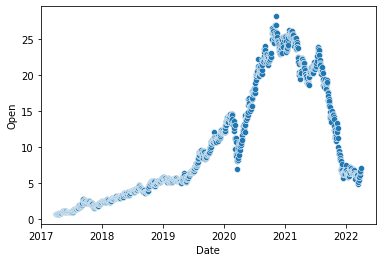

In [ ]:
type(df_magalu3['Date'].unique()[0])
sns.scatterplot(x=df_magalu3['Date'],    
                y=df_magalu3['Open'])


In [ ]:
df_magalu3['Open'].describe()

count    1243.000000
mean       10.142411
std         7.835271
min         0.679687
25%         3.698437
50%         6.680000
75%        16.682500
max        28.150000
Name: Open, dtype: float64

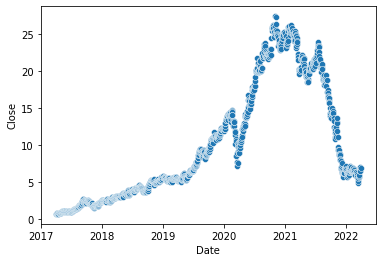

In [ ]:
sns.scatterplot(x=df_magalu3['Date'],    
                y=df_magalu3['Close'])

In [ ]:
df_magalu3['Close'].describe()

count    1243.000000
mean       10.125860
std         7.824037
min         0.671914
25%         3.717187
50%         6.660000
75%        16.595000
max        27.450001
Name: Close, dtype: float64

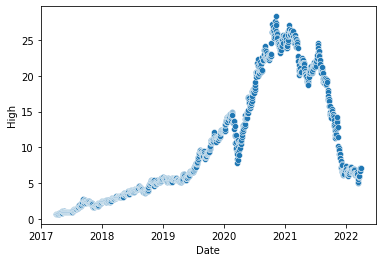

In [ ]:
sns.scatterplot(x=df_magalu3['Date'],    
                y=df_magalu3['High'])

In [ ]:
df_magalu3['High'].describe()

count    1243.000000
mean       10.347453
std         7.969761
min         0.710937
25%         3.794531
50%         6.902187
75%        16.987499
max        28.309999
Name: High, dtype: float64

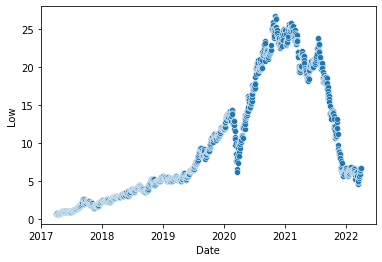

In [ ]:
sns.scatterplot(x=df_magalu3['Date'],    
                y=df_magalu3['Low'])

In [ ]:
df_magalu3['Low'].describe()

count    1243.000000
mean        9.917094
std         7.682529
min         0.660156
25%         3.622500
50%         6.469687
75%        16.173750
max        26.740000
Name: Low, dtype: float64

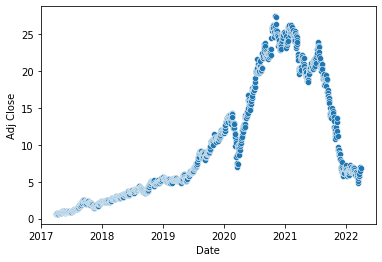

In [ ]:
sns.scatterplot(x=df_magalu3['Date'],    
                y=df_magalu3['Adj Close'])

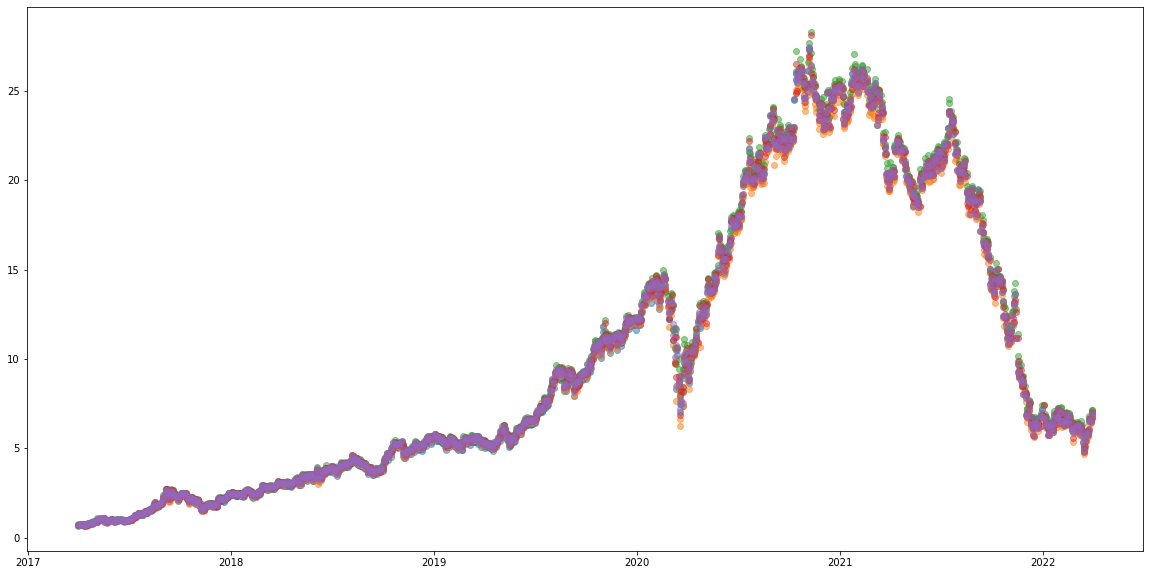

In [ ]:
plt.figure(figsize=(20,10))
p1= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Adj Close'], alpha= 0.5)
p2= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Low'], alpha= 0.5)
p3= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['High'], alpha= 0.5)
p4= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Open'], alpha= 0.5)
p5= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Close'], alpha= 0.5)

In [ ]:
close_shift= df_magalu3['Close']-df_magalu3['Close'].shift(1)
open_shift= df_magalu3['Open']-df_magalu3['Open'].shift(1)
high_shift= df_magalu3['High']-df_magalu3['High'].shift(1)
low_shift= df_magalu3['Low']-df_magalu3['Low'].shift(1)

In [ ]:
close_shift.dropna()

1       0.023008
2       0.003125
3       0.011875
4       0.004571
5      -0.001758
          ...   
1238    0.600000
1239   -0.060000
1240   -0.070000
1241    0.530000
1242   -0.130000
Name: Close, Length: 1242, dtype: float64

In [ ]:
import scipy.stats as ss
ss.kurtosis(close_shift, nan_policy= 'omit')


7.035368426154461

In [ ]:
ss.skew(close_shift, bias= True, nan_policy= 'omit')

masked_array(data=-0.25178807,
             mask=False,
       fill_value=1e+20)

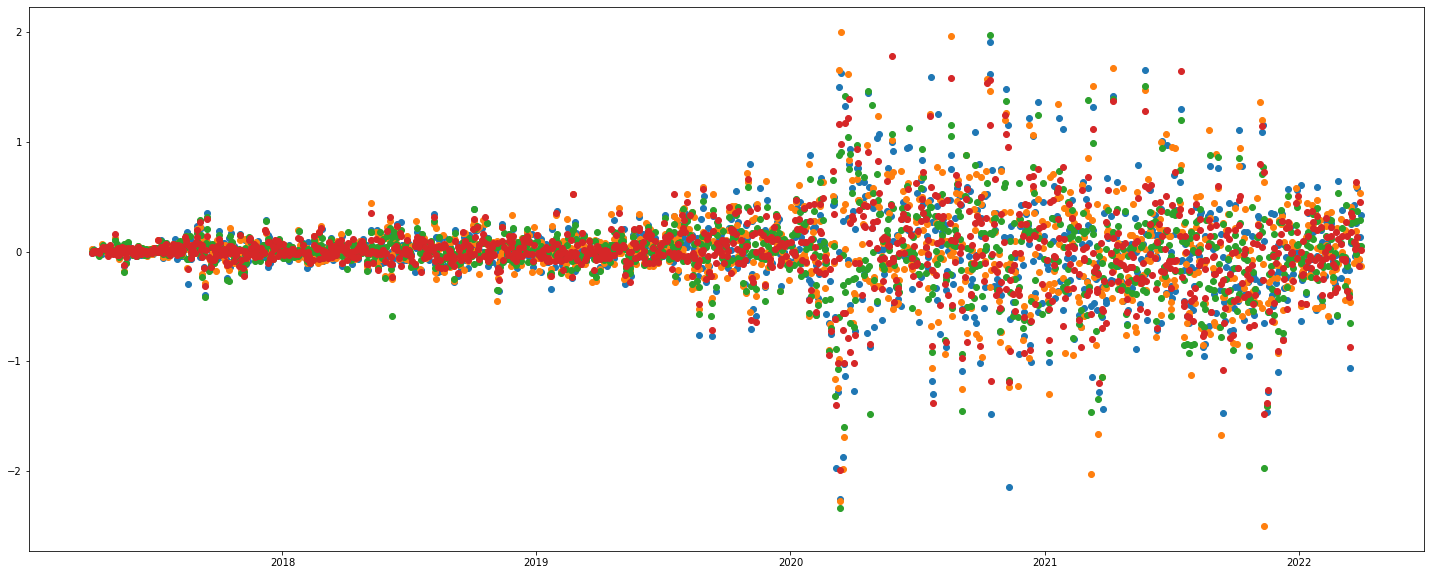

In [ ]:
open_shift= df_magalu3['Open']-df_magalu3['Open'].shift(1)
plt.figure(figsize=(25,10))
p6= plt.scatter(x=df_magalu3['Date'],    
                y=open_shift)
p5= plt.scatter(x=df_magalu3['Date'],    
                y=close_shift)
p7= plt.scatter(x=df_magalu3['Date'],    
                y=low_shift)
p8= plt.scatter(x=df_magalu3['Date'],    
                y=high_shift)
axlim= [2016,2020]


<Figure size 864x576 with 0 Axes>

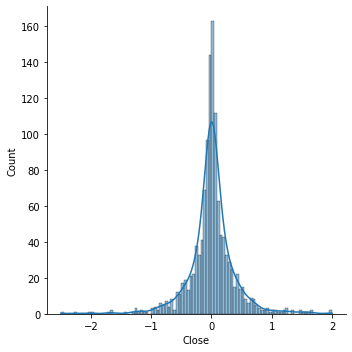

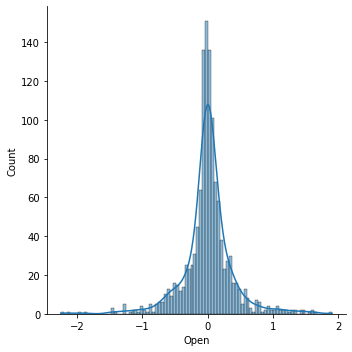

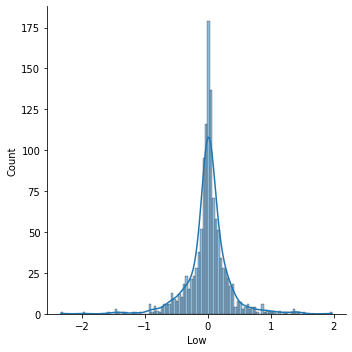

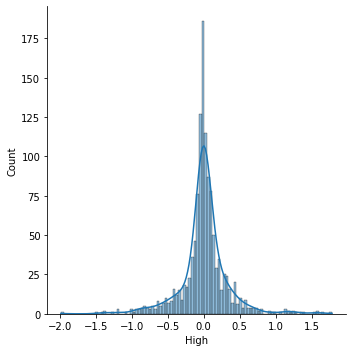

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(x=close_shift, kde=True)
sns.displot(x=open_shift, kde=True)
sns.displot(x=low_shift, kde=True)
sns.displot(x=high_shift, kde=True)

In [ ]:
close_shift.skew()

-0.2520926338507115

In [ ]:
close_shift.kurtosis()

7.0686200015322616

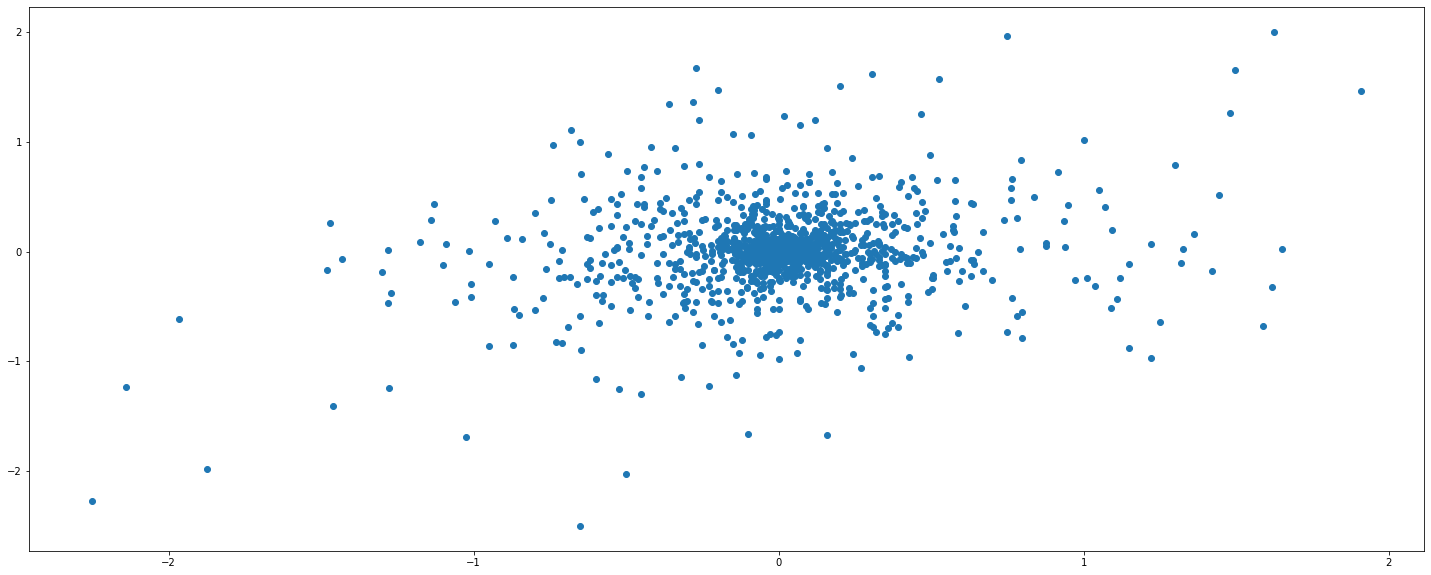

In [ ]:
plt.figure(figsize=(25,10))
p10= plt.scatter(x=open_shift,    
                y=close_shift)

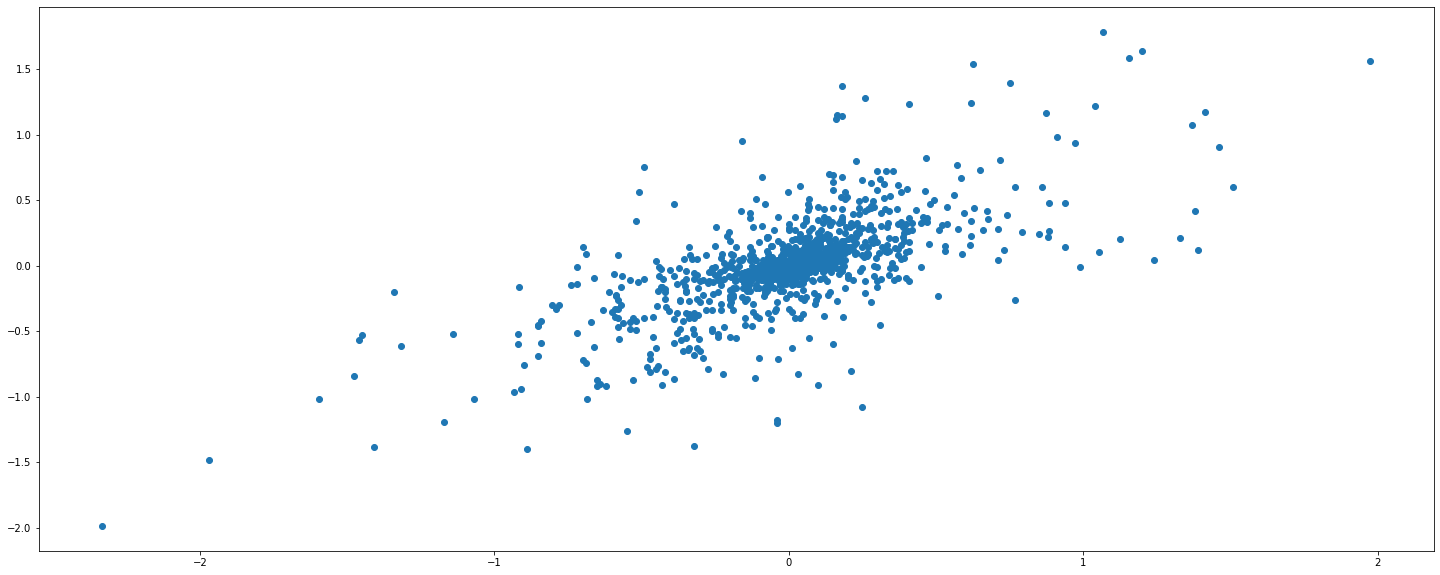

In [ ]:
plt.figure(figsize=(25,10))
p11= plt.scatter(x=low_shift,    
                y=high_shift)

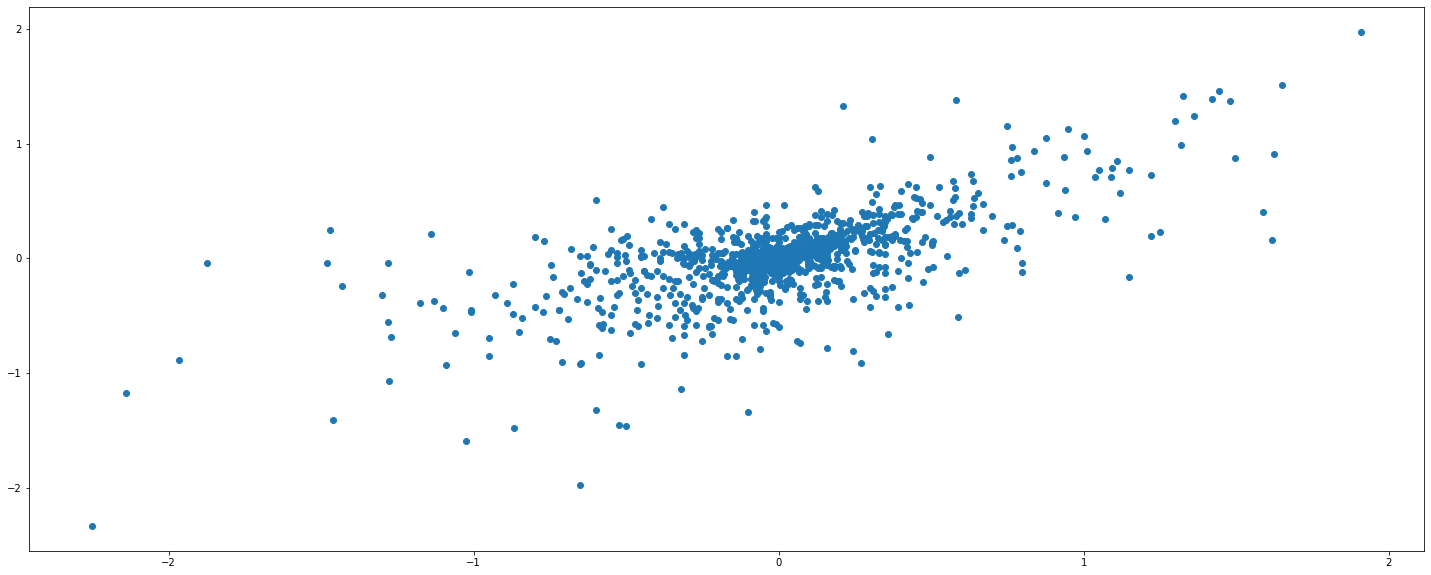

In [ ]:
plt.figure(figsize=(25,10))
p12= plt.scatter(x=open_shift,    
                y=low_shift)

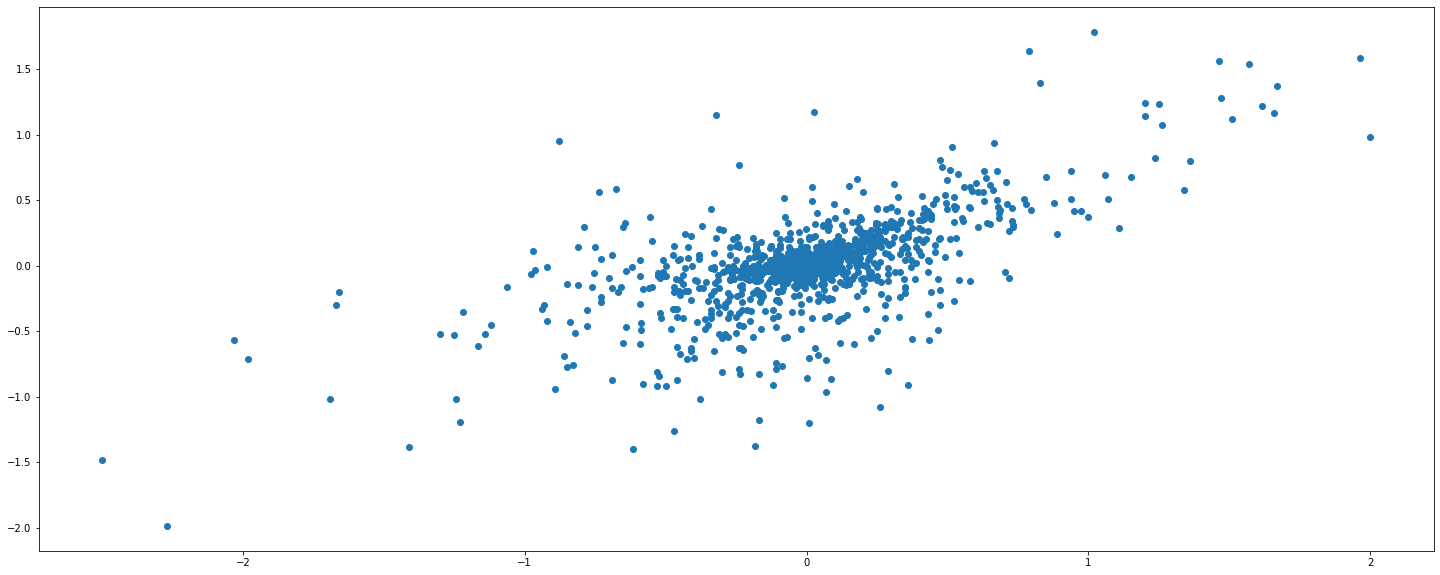

In [ ]:
plt.figure(figsize=(25,10))
p13= plt.scatter(x=close_shift,    
                y=high_shift)

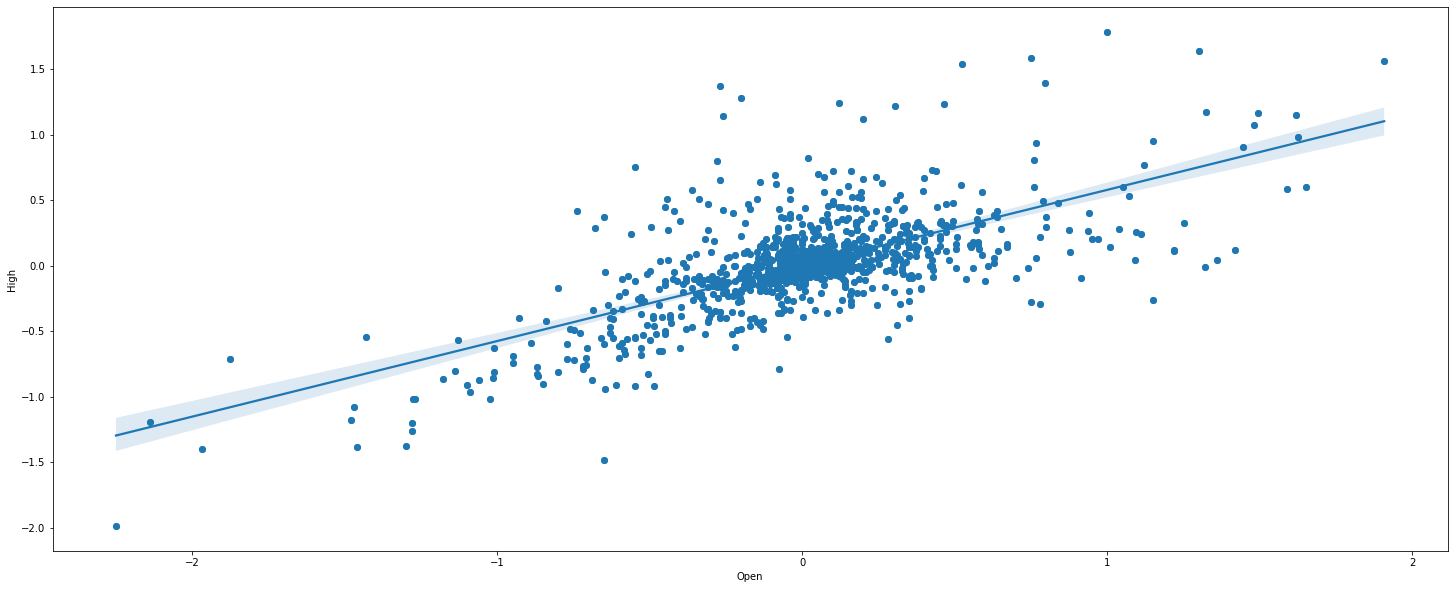

In [ ]:
plt.figure(figsize=(25,10))
p14= plt.scatter(x=open_shift,    
                y=high_shift)
sns.regplot(x=open_shift,    
                y=high_shift)

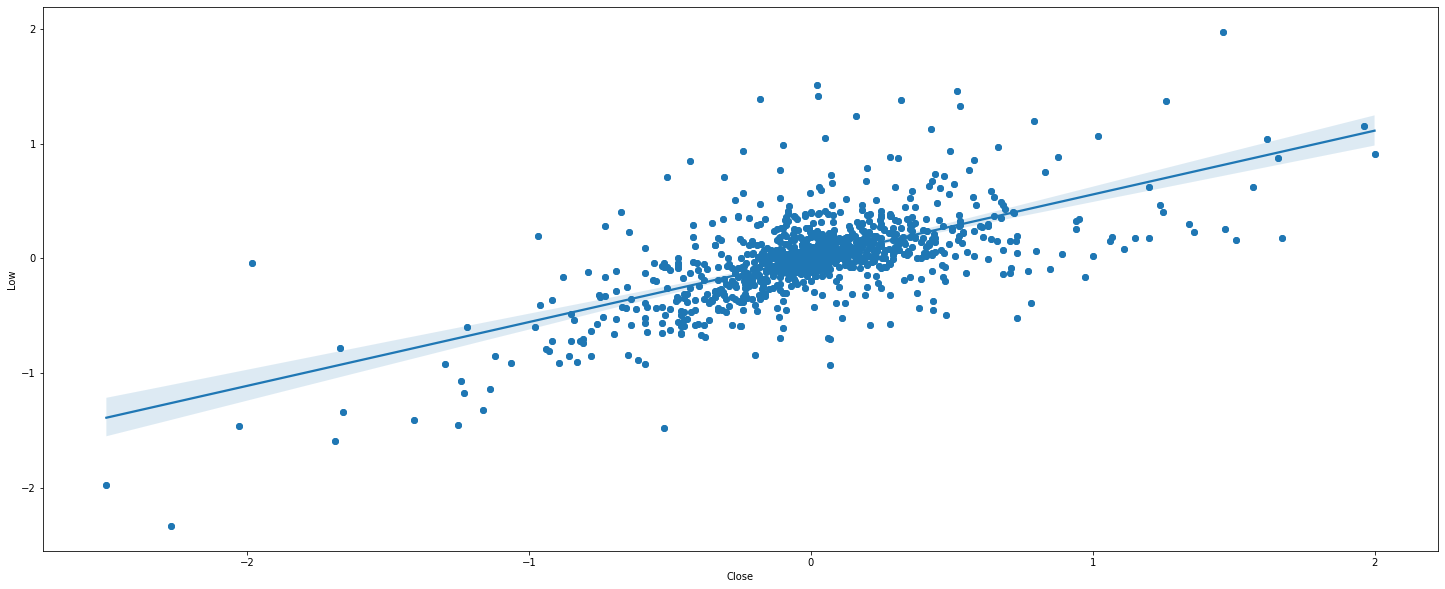

In [ ]:
plt.figure(figsize=(25,10))
p15= plt.scatter(x=close_shift,    
                y=low_shift)
sns.regplot(x=close_shift,    
                y=low_shift)


#clusterizando!!!!!

In [ ]:
df_magalu3['Date']<pd.to_datetime(2020)

0       False
1       False
2       False
3       False
4       False
        ...  
1238    False
1239    False
1240    False
1241    False
1242    False
Name: Date, Length: 1243, dtype: bool

In [ ]:
df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Date']

0     2017-03-31
1     2017-04-03
2     2017-04-04
3     2017-04-05
4     2017-04-06
         ...    
682   2019-12-20
683   2019-12-23
684   2019-12-26
685   2019-12-27
686   2019-12-30
Name: Date, Length: 687, dtype: datetime64[ns]

In [ ]:
#df_magalu3.info()
df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Date']

687    2020-01-02
688    2020-01-03
689    2020-01-06
690    2020-01-07
691    2020-01-08
          ...    
1238   2022-03-24
1239   2022-03-25
1240   2022-03-28
1241   2022-03-29
1242   2022-03-30
Name: Date, Length: 556, dtype: datetime64[ns]

In [ ]:
df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]

,Date,Open,High,Low,Close,Adj Close,Volume
687,2020-01-02,12.075,12.3325,11.9275,12.3325,12.029735,29600800
688,2020-01-03,12.125,12.3325,12.0750,12.2225,11.922435,26737600
689,2020-01-06,12.100,12.3275,11.9500,12.2325,11.932189,27359200
690,2020-01-07,12.235,12.3000,12.1250,12.1975,11.898048,26818800
691,2020-01-08,12.155,12.5875,12.1250,12.5725,12.263842,40007200
...,...,...,...,...,...,...,...
1238,2022-03-24,6.050,6.6700,5.9700,6.6000,6.600000,185541800
1239,2022-03-25,6.630,6.8000,6.3400,6.5400,6.540000,139970100
1240,2022-03-28,6.550,6.6700,6.3900,6.4700,6.470000,81990200
1241,2022-03-29,6.680,7.1200,6.6800,7.0000,7.000000,167686200


In [ ]:
date_1= df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Date']
close_shift_1= df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Close']-df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Close'].shift(1)
open_shift_1= df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Open']-df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Open'].shift(1)
high_shift_1= df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['High']-df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['High'].shift(1)
low_shift_1= df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Low']-df_magalu3[df_magalu3['Date']<pd.to_datetime('2020-01-01')]['Low'].shift(1)

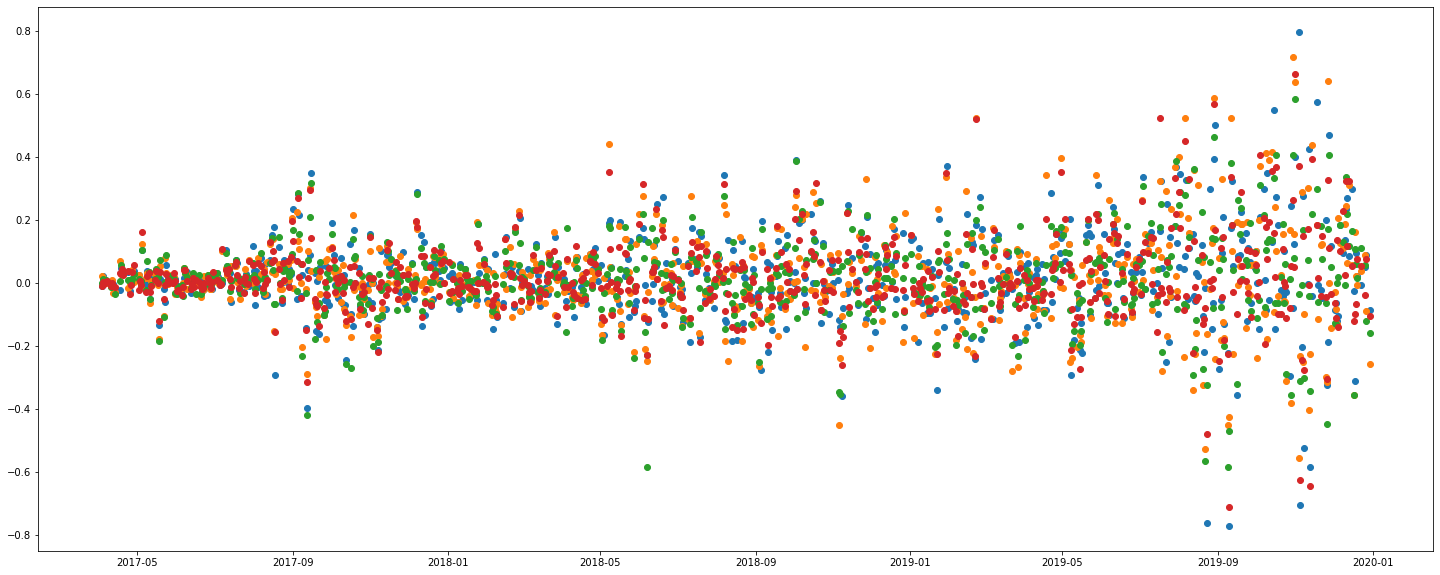

In [ ]:
plt.figure(figsize=(25,10))
p21= plt.scatter(x=date_1,    
                y=open_shift_1)
p22= plt.scatter(x=date_1,    
                y=close_shift_1)
p23= plt.scatter(x=date_1,    
                y=low_shift_1)
p24= plt.scatter(x=date_1,    
                y=high_shift_1)

In [ ]:
date_2= df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Date']
close_shift_2= df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Close']-df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Close'].shift(1)
open_shift_2= df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Open']-df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Open'].shift(1)
high_shift_2= df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['High']-df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['High'].shift(1)
low_shift_2= df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Low']-df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Low'].shift(1)
volume_2=df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Volume']-df_magalu3[(~(df_magalu3['Date']<pd.to_datetime('2020-01-01')))]['Volume'].shift(1)

In [ ]:
len(date_2)
#len(close_shift_2)

556

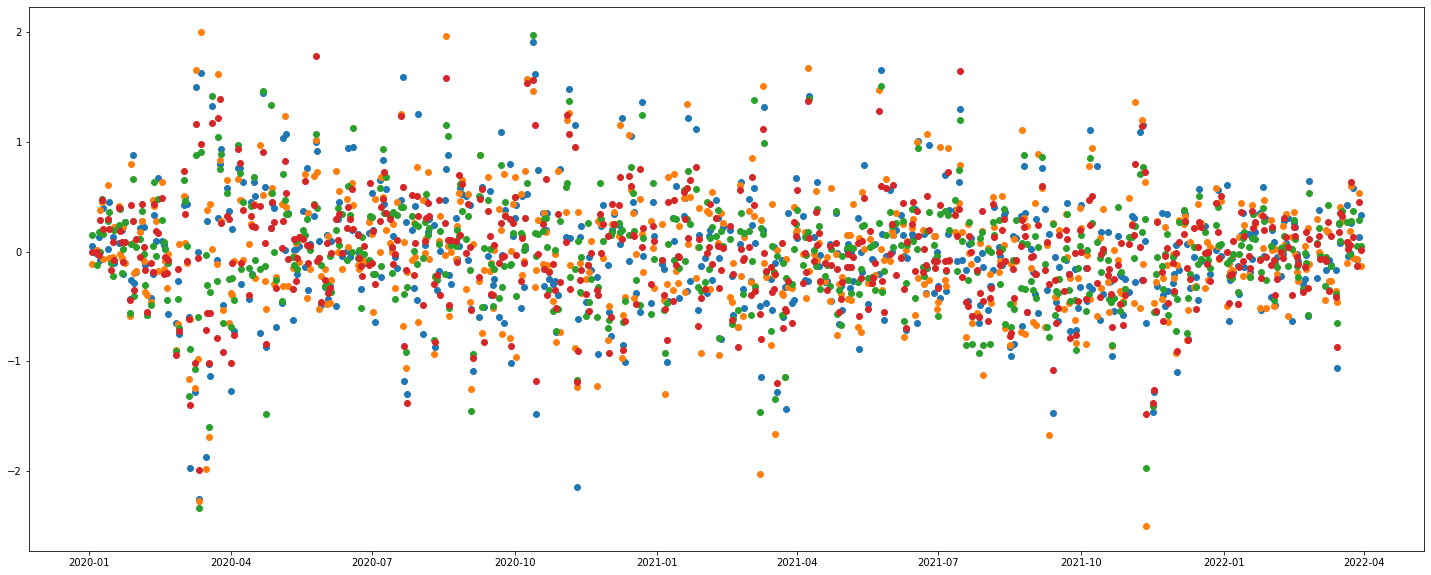

In [ ]:
plt.figure(figsize=(25,10))
p25= plt.scatter(x=date_2,    
                y=open_shift_2)
p26= plt.scatter(x=date_2,    
                y=close_shift_2)
p26= plt.scatter(x=date_2,    
                y=low_shift_2)
p27= plt.scatter(x=date_2,    
                y=high_shift_2)

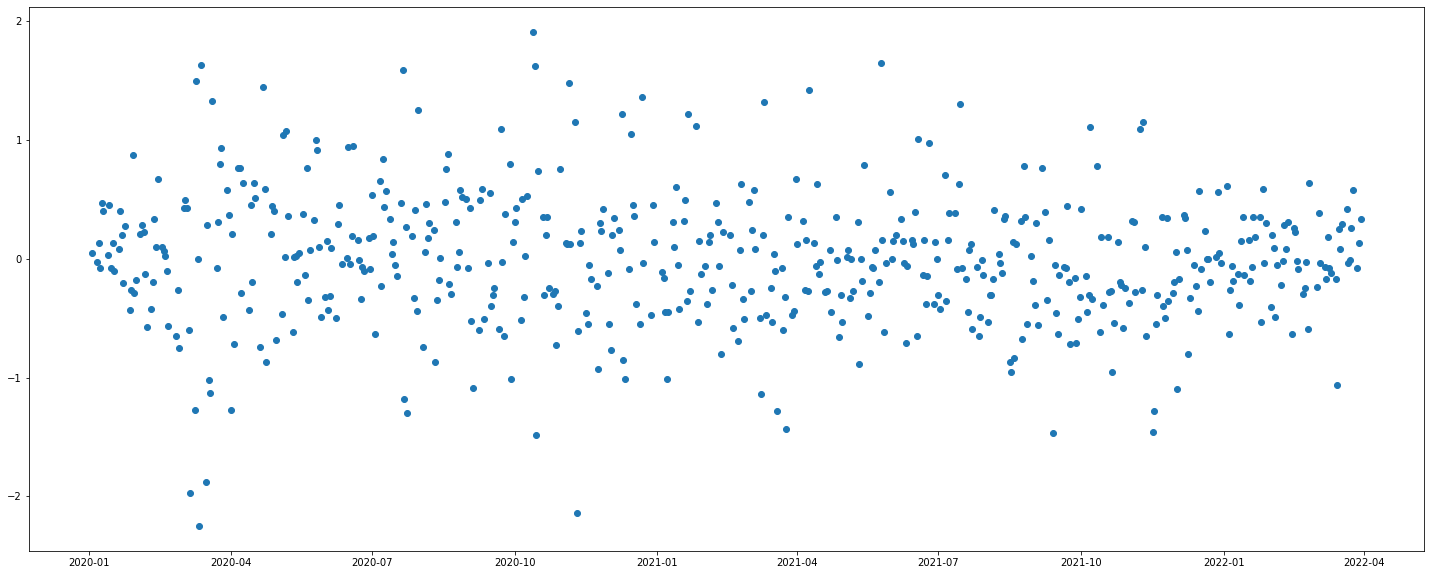

In [ ]:
plt.figure(figsize=(25,10))
p25= plt.scatter(x=date_2,    
                y=open_shift_2)

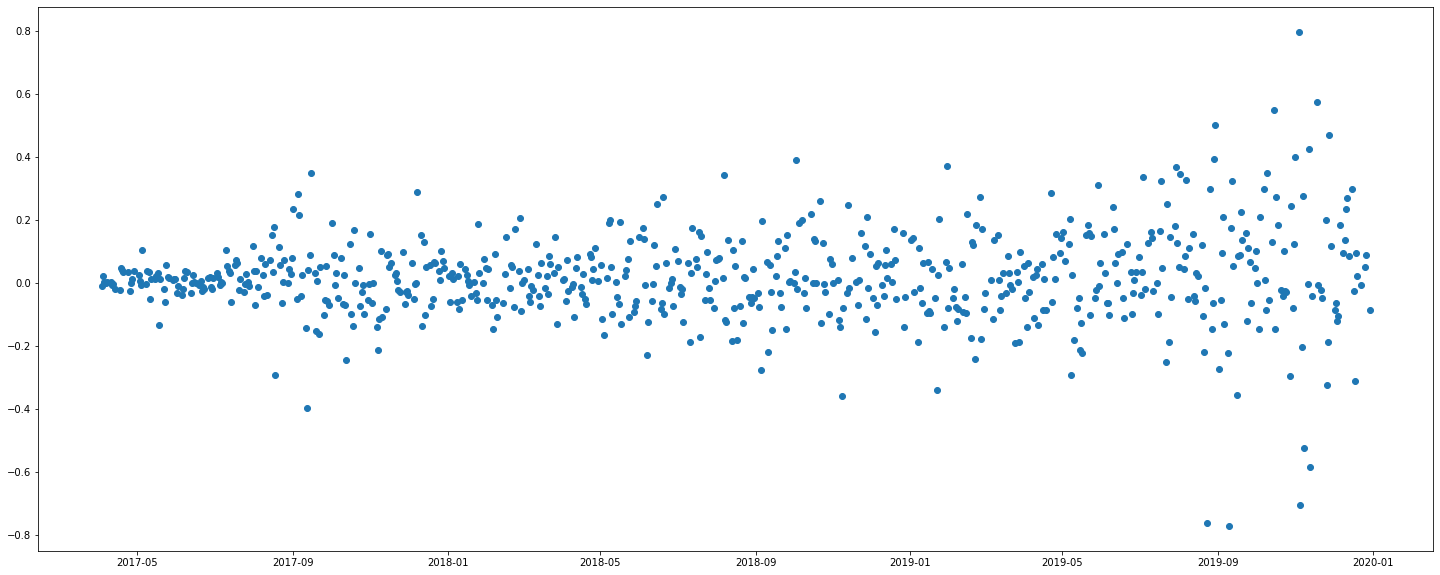

In [ ]:
plt.figure(figsize=(25,10))
p21= plt.scatter(x=date_1,    
                y=open_shift_1)

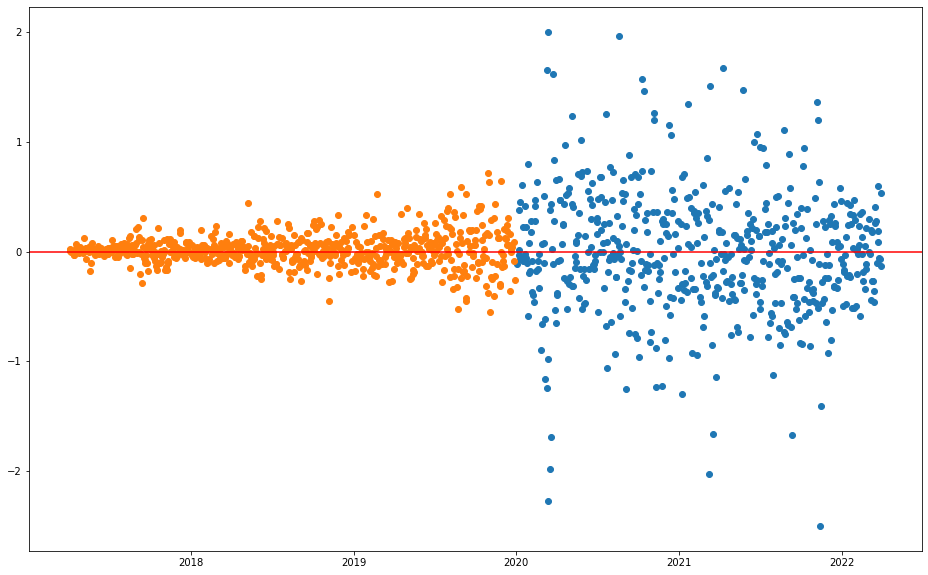

In [ ]:
plt.figure(figsize=(16,10))
p26= plt.scatter(x=date_2,    
                y=close_shift_2)
p22= plt.scatter(x=date_1,    
                y=close_shift_1)
plt.axhline(y=0, color= 'red')

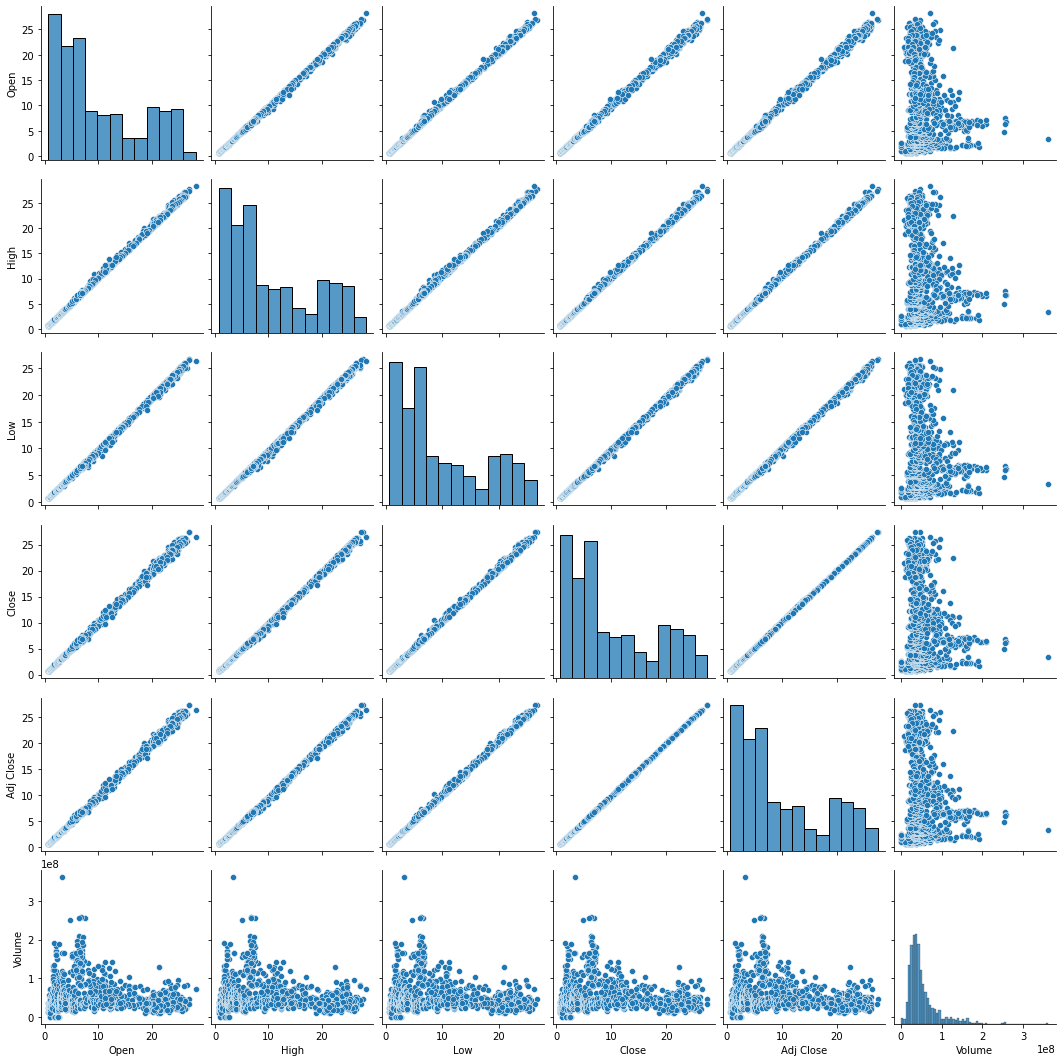

In [ ]:
sns.pairplot(df_magalu3)

In [ ]:
df_magalu3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1243 non-null   datetime64[ns]
 1   Open       1243 non-null   float64       
 2   High       1243 non-null   float64       
 3   Low        1243 non-null   float64       
 4   Close      1243 non-null   float64       
 5   Adj Close  1243 non-null   float64       
 6   Volume     1243 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.1 KB


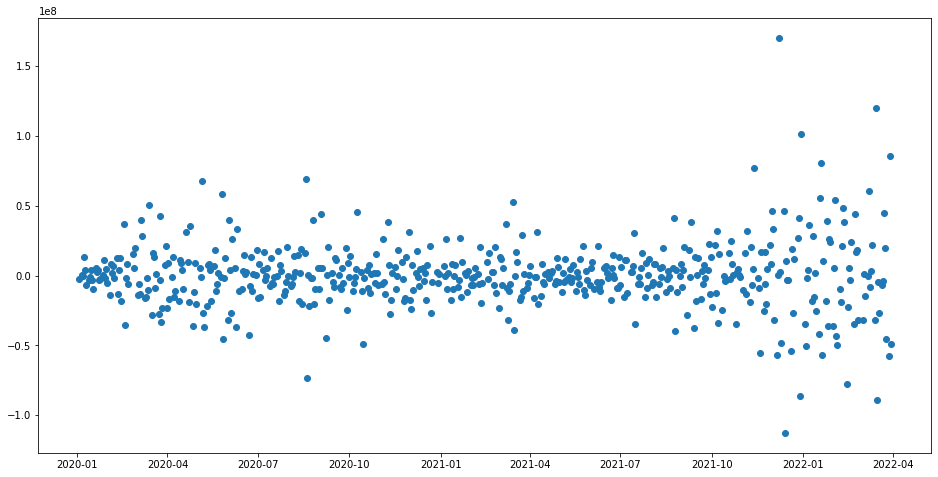

In [ ]:
plt.figure(figsize=(16,8))
p26= plt.scatter(x=date_2,    
                y=volume_2)

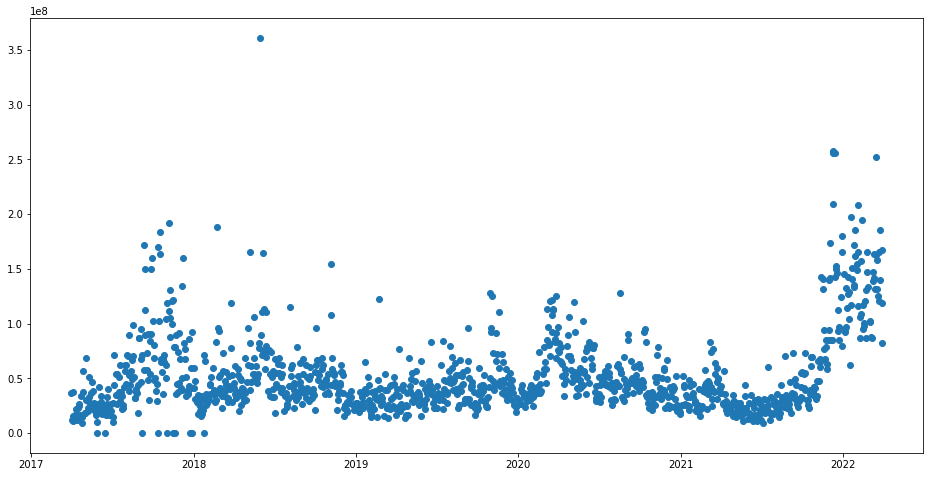

In [ ]:
plt.figure(figsize=(16,8))
p26= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Volume'])

In [ ]:
df_magalu3['Volume'].unique()

array([ 36710400,  12288000,  15539200, ...,  81990200, 167686200,
       118907800])

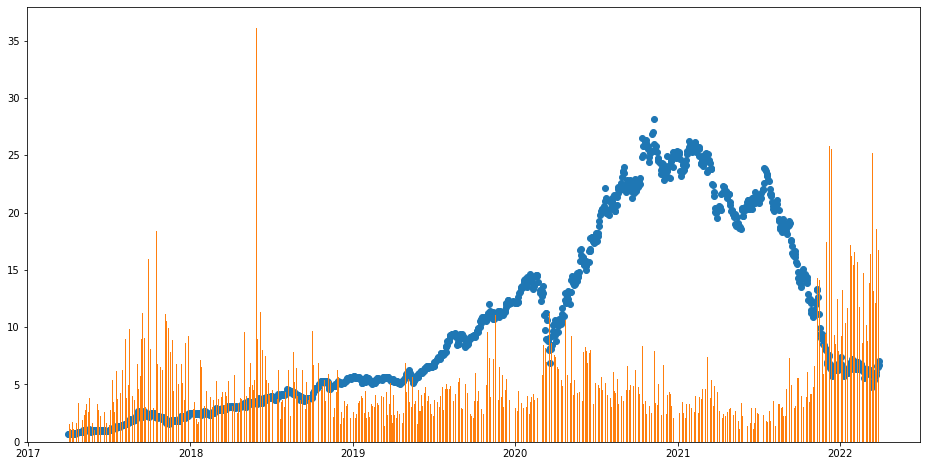

In [ ]:
plt.figure(figsize=(16,8))
p26= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Open'])
p27= plt.bar(x=df_magalu3['Date'],    
                height=df_magalu3['Volume']/10000000)

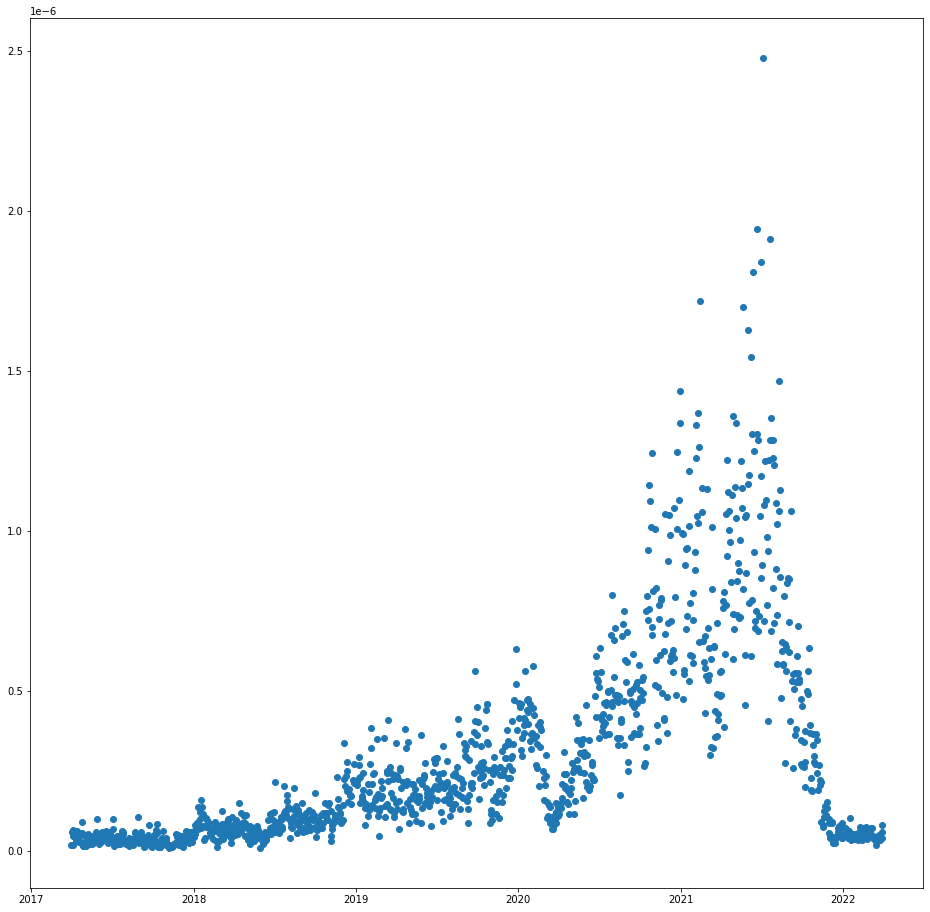

In [ ]:
plt.figure(figsize=(16,16))
p27= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['High']/df_magalu3['Volume'])

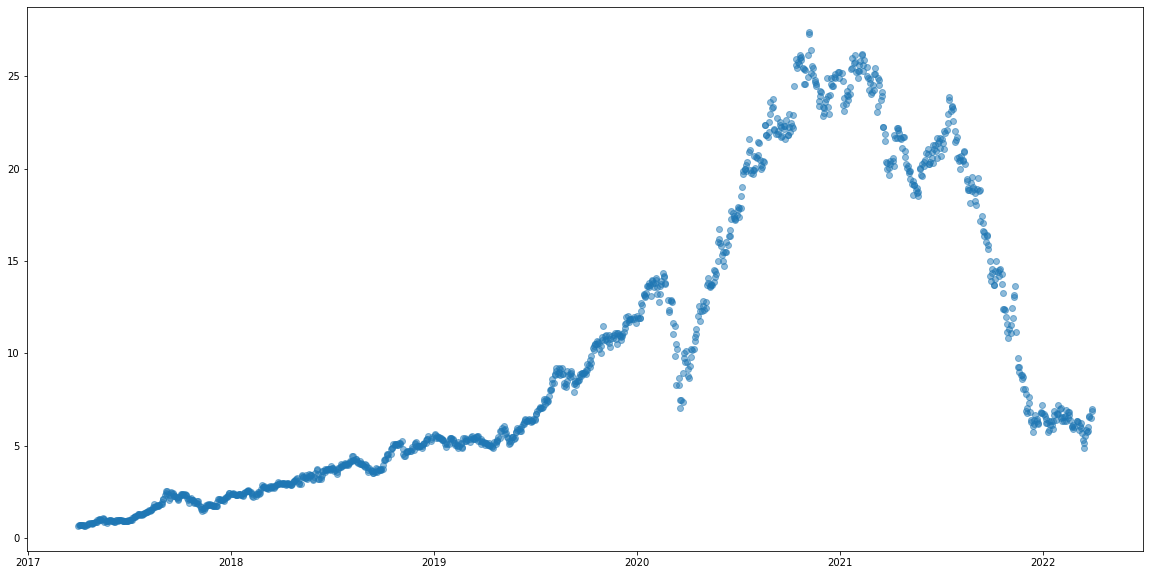

In [ ]:
plt.figure(figsize=(20,10))
p30= plt.scatter(x=df_magalu3['Date'],    
                y=df_magalu3['Adj Close'], alpha= 0.5)

In [ ]:
len(df_magalu3['Adj Close'])

1243

In [ ]:
len(df_dolar['Adj Close'])

1304

In [ ]:
df_magalu3['Date'].iloc[-1]


Timestamp('2022-03-30 00:00:00')

In [ ]:
df_dolar['Date'].iloc[-1]

Timestamp('2022-03-30 00:00:00')

In [ ]:
df_magalu3['Date'][0]

Timestamp('2017-03-31 00:00:00')

In [ ]:
df_dolar['Date'][0]

Timestamp('2017-03-31 00:00:00')

In [ ]:
df_dolar['Date'].unique()

array(['2017-03-31T00:00:00.000000000', '2017-04-03T00:00:00.000000000',
       '2017-04-04T00:00:00.000000000', ...,
       '2022-03-28T00:00:00.000000000', '2022-03-29T00:00:00.000000000',
       '2022-03-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df_magalu3['Date'].unique()

array(['2017-03-31T00:00:00.000000000', '2017-04-03T00:00:00.000000000',
       '2017-04-04T00:00:00.000000000', ...,
       '2022-03-28T00:00:00.000000000', '2022-03-29T00:00:00.000000000',
       '2022-03-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
print(f'tamanho de magalu {len(df_magalu3["Date"].unique())}, tamanho do dolar {len(df_dolar["Date"].unique())} ')

tamanho de magalu 1243, tamanho do dolar 1304 


In [ ]:
df_magalu3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-31,0.706562,0.740195,0.691796,0.691796,0.660278,36710400
1,2017-04-03,0.697304,0.730078,0.691445,0.714804,0.682238,12288000
2,2017-04-04,0.718750,0.734375,0.703515,0.717929,0.685221,15539200
3,2017-04-05,0.722031,0.729843,0.710898,0.729804,0.696555,37401600
4,2017-04-06,0.722500,0.734375,0.721406,0.734375,0.700918,10880000
...,...,...,...,...,...,...,...
1238,2022-03-24,6.050000,6.670000,5.970000,6.600000,6.600000,185541800
1239,2022-03-25,6.630000,6.800000,6.340000,6.540000,6.540000,139970100
1240,2022-03-28,6.550000,6.670000,6.390000,6.470000,6.470000,81990200
1241,2022-03-29,6.680000,7.120000,6.680000,7.000000,7.000000,167686200


In [ ]:
df_dolar

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-31,3.1476,3.17470,3.125500,3.1477,3.1477,0.0
1,2017-04-03,3.1203,3.13150,3.101200,3.1218,3.1218,0.0
2,2017-04-04,3.1133,3.13580,3.110600,3.1130,3.1130,0.0
3,2017-04-05,3.0931,3.09720,3.071800,3.0956,3.0956,0.0
4,2017-04-06,3.1200,3.12500,3.098200,3.1196,3.1196,0.0
...,...,...,...,...,...,...,...
1299,2022-03-24,4.8242,4.83757,4.763647,4.8242,4.8242,0.0
1300,2022-03-25,4.8261,4.82850,4.746200,4.8263,4.8263,0.0
1301,2022-03-28,4.7369,4.81580,4.730483,4.7369,4.7369,0.0
1302,2022-03-29,4.7641,4.77110,4.714928,4.7641,4.7641,0.0


In [ ]:
#for i in range(len(df_dolar['Date'].unique())):
#print(f'vamos ver se é igual {((df_dolar["Date"].iloc[i])==(df_magalu3["Date"].iloc[i]))}')
print(f"{df_magalu3['Date'].iloc[9]} = {df_dolar['Date'].iloc[9]}")

2017-04-13 00:00:00 = 2017-04-13 00:00:00


In [ ]:
#selecionando os dados que existem nos dois 
#serie data
datas= [df_magalu3.iloc[i] for i in df_dolar['Date']]
  

TypeError: ignored

In [ ]:
print(f'O numero de termos do dolar é: {len(df_dolar)} o numero de termos da magalué: {len(df_magalu3)}')

O numero de termos do dolar é: 1304 o numero de termos da magalué: 1243


In [ ]:
datas_comuns=[]
preco_magalu=[]
volume_magalu=[]
preco_dolar=[]
for i in range(len(df_dolar)):
  for j in range(len(df_magalu3)):
    if df_dolar['Date'].iloc[i]== df_magalu3['Date'].iloc[j]:
      datas_comuns.append(df_magalu3['Date'].iloc[j])
      preco_magalu.append(df_magalu3['Adj Close'].iloc[j])
      volume_magalu.append(df_magalu3['Volume'].iloc[j])
      preco_dolar.append(df_dolar['Adj Close'].iloc[i])


In [ ]:
df_magalu3_dolar= pd.DataFrame({'Data': datas_comuns,
                    'MAGALU3': preco_magalu,
                    'DOLAR':preco_dolar,
                    'VOLUME MAGALU3':volume_magalu})

In [ ]:
df_magalu3_dolar['Data'] = pd.to_datetime(df_magalu3_dolar['Data'])

In [ ]:
df_magalu3_dolar['Data']

0      2017-03-31
1      2017-04-03
2      2017-04-04
3      2017-04-05
4      2017-04-06
          ...    
1238   2022-03-24
1239   2022-03-25
1240   2022-03-28
1241   2022-03-29
1242   2022-03-30
Name: Data, Length: 1243, dtype: datetime64[ns]

Text(0.5, 1.0, 'Primeiro ajuste manual do preço da ação em função da cotação do dólar no mesmo período')

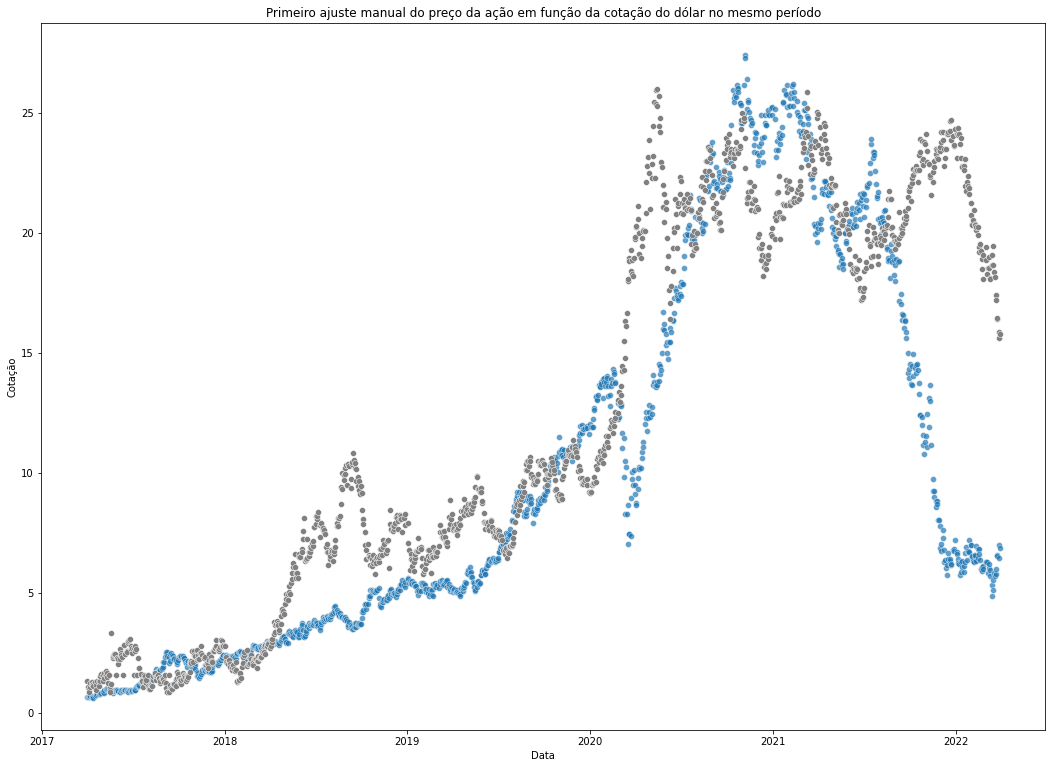

In [ ]:
plt.figure(figsize=(18,13))
sns.scatterplot(x=df_magalu3_dolar['Data'],
                y=df_magalu3_dolar['MAGALU3'],
                alpha=0.7)
sns.scatterplot(x=df_magalu3_dolar['Data'],
                y=df_magalu3_dolar['DOLAR']*9-27, color='grey'
                )
plt.ylabel('Cotação')
plt.title("Primeiro ajuste manual do preço da ação em função da cotação do dólar no mesmo período")


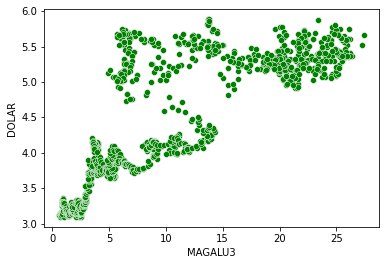

In [ ]:
sns.scatterplot(x='MAGALU3', y='DOLAR', data= df_magalu3_dolar, color= 'green')

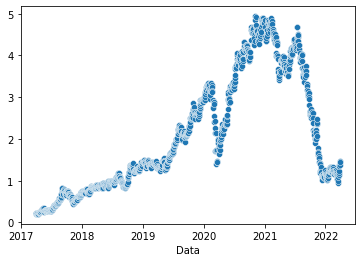

In [ ]:
sns.scatterplot(x=df_magalu3_dolar['Data'],
                y=(df_magalu3_dolar['MAGALU3']/df_magalu3_dolar['DOLAR']),
                )

In [ ]:
df_magalu3_dolar['DivisaoMagaluDolar']=df_magalu3_dolar['MAGALU3']/df_magalu3_dolar['DOLAR']

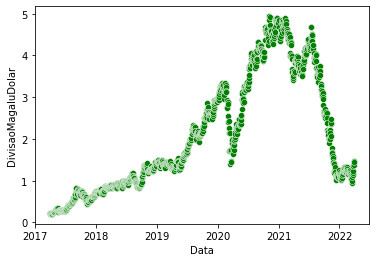

In [ ]:
sns.scatterplot(x='Data', y='DivisaoMagaluDolar', data= df_magalu3_dolar, color= 'green'
    
)

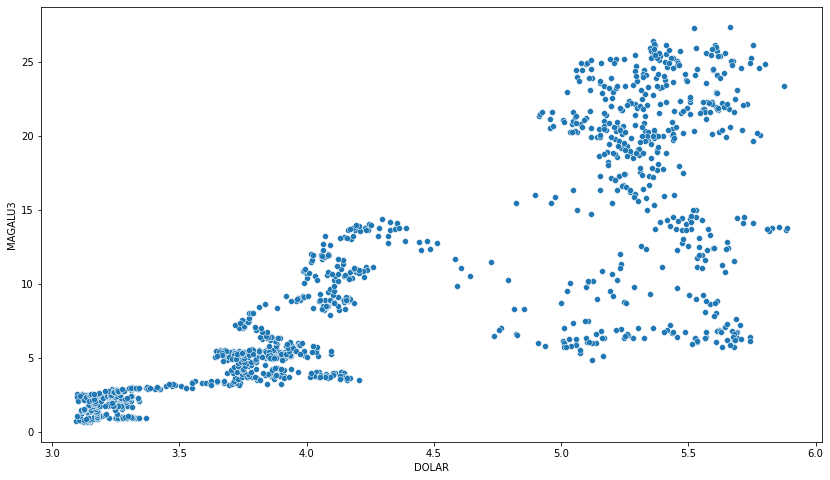

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_magalu3_dolar['DOLAR'],
                y=df_magalu3_dolar['MAGALU3'],
                )

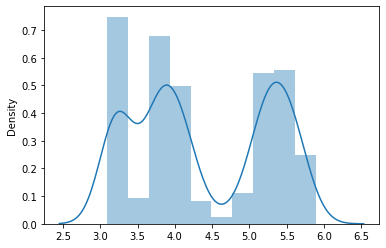

In [ ]:
sns.distplot(x=df_magalu3_dolar['DOLAR'])

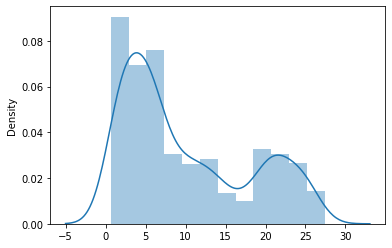

In [ ]:
sns.distplot(x=df_magalu3_dolar['MAGALU3'])

In [ ]:
df_magalu3_dolar['MAGALU3'].min()

0.641302

In [ ]:
df_magalu3_dolar['MAGALU3'].max()

27.401571

In [ ]:
df_magalu3_dolar['MAGALU3'].mean()

10.0205253081255

In [ ]:
df_selic= pd.read_csv('/content/drive/MyDrive/selic2001_2021.csv', decimal=',')
df_selic['previto']

0     11.75
1     10.75
2      9.25
3      7.75
4      6.25
5      5.25
6      4.25
7      3.50
8      2.75
9      2.00
10     2.00
11     2.00
12     2.00
13     2.00
14     2.25
15     3.00
16     3.75
17     4.25
18     4.50
19     5.00
20     5.50
21     6.00
22     6.50
23     6.50
24     6.50
25     6.50
26     6.50
27     6.50
28     6.50
29     6.50
30     6.50
31     6.50
32     6.50
33     6.75
34     7.00
35     7.50
36     8.25
37     9.25
38    10.25
39    11.25
40    12.25
41    13.00
Name: previto, dtype: float64

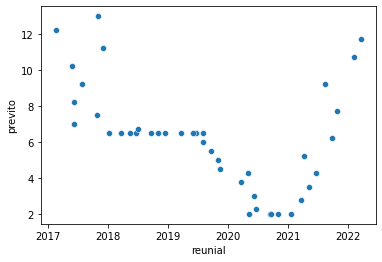

In [ ]:
df_selic['reunial']= pd.to_datetime(df_selic['reunial'])
sns.scatterplot(x= df_selic['reunial'],
                y=df_selic['previto'])

Text(0.5, 1.0, 'Cotação de dólar, magalu3 e taxa selic')

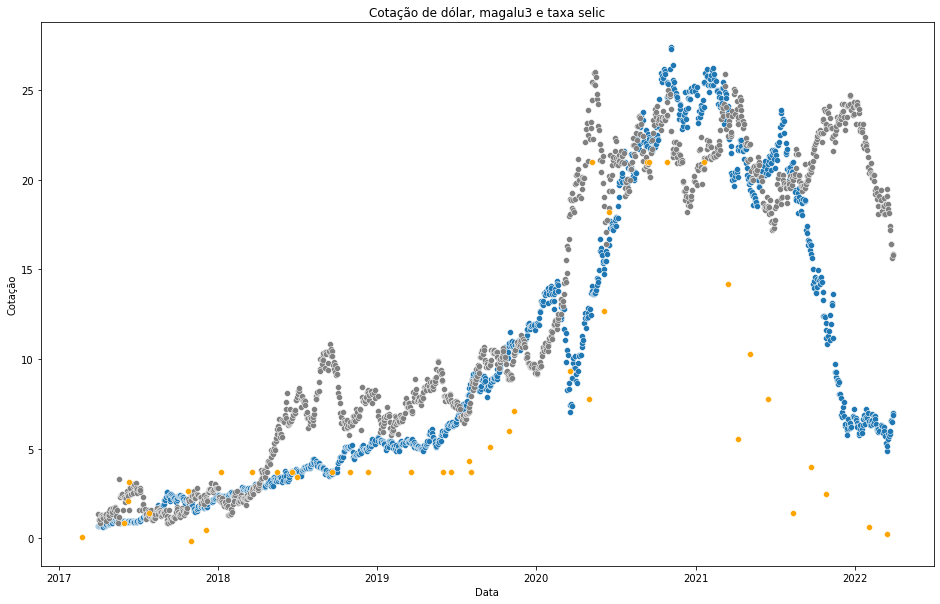

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_magalu3_dolar['Data'],
                y=df_magalu3_dolar['MAGALU3']
                , legend='auto')
sns.scatterplot(x=df_magalu3_dolar['Data'],
                y=df_magalu3_dolar['DOLAR']*9-27, color='grey'
                , legend='auto')
df_selic['reunial']= pd.to_datetime(df_selic['reunial'])
sns.scatterplot(x= df_selic['reunial'],
                y=50/df_selic['previto']-4, color='orange', legend='auto')
plt.ylabel('Cotação')
plt.title('Cotação de dólar, magalu3 e taxa selic')

In [ ]:
magalu= df_magalu3_dolar.groupby(pd.PeriodIndex(df_magalu3_dolar['Data'], freq="M"))['MAGALU3'].mean()
volume_magalu= df_magalu3_dolar.groupby(pd.PeriodIndex(df_magalu3_dolar['Data'], freq="M"))['VOLUME MAGALU3'].mean()
dolar= df_magalu3_dolar.groupby(pd.PeriodIndex(df_magalu3_dolar['Data'], freq="M"))['DOLAR'].mean()
selic= df_selic.groupby(pd.PeriodIndex(df_selic['reunial'], freq= "M"))['previto'].mean()

In [ ]:
df_magalu3_dolar_02= pd.DataFrame({'MAGALU3':magalu,
                                   'VOLUME MAGALU3':volume_magalu,
                                   'DOLAR':dolar,
                                   'SELIC':selic})

In [ ]:
df_magalu3_dolar_02.index=df_magalu3_dolar_02.index.to_timestamp()

In [ ]:
df_magalu3_dolar_02.dropna()

,MAGALU3,VOLUME MAGALU3,DOLAR,SELIC
2017-05-01,0.951846,2.782604e+07,3.202105,10.250
2017-06-01,0.931992,2.408029e+07,3.285277,7.625
2017-07-01,1.189775,3.764419e+07,3.197905,9.250
2017-10-01,2.163883,7.378938e+07,3.187127,7.500
2017-11-01,1.731594,8.021484e+07,3.255648,13.000
2017-12-01,2.073902,5.893699e+07,3.293243,11.250
2018-01-01,2.391999,3.246909e+07,3.211877,6.500
2018-03-01,2.794786,4.819230e+07,3.273562,6.500
2018-05-01,3.247356,8.133684e+07,3.619986,6.500
2018-06-01,3.573315,7.386316e+07,3.774233,6.500


Text(0.5, 1.0, 'Cotação mensal de dólar, magalu3 e taxa selic')

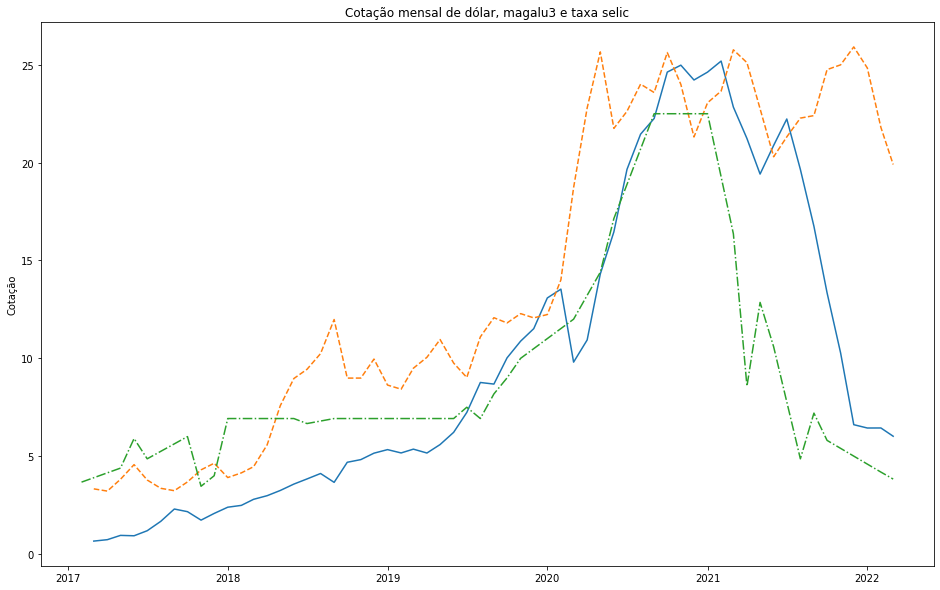

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x=df_magalu3_dolar_02.index,
             y=df_magalu3_dolar_02['MAGALU3'])
sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['DOLAR']*9-25,ls='--')
sns.lineplot(x= df_magalu3_dolar_02.index,y=15/df_magalu3_dolar_02['SELIC']*3,ls='-.')
#sns.scatterplot(x= df_magalu3_dolar_02.index, y=(9.8*df_magalu3_dolar_02['DOLAR']/(df_magalu3_dolar_02['SELIC'])*(df_magalu3_dolar_02['SELIC']))-3)
plt.ylabel('Cotação')
plt.title('Cotação mensal de dólar, magalu3 e taxa selic')

Text(0.5, 1.0, 'Cotação mensal magalu3 e simulação (f= 45/selic + 5*dólar - 21)')

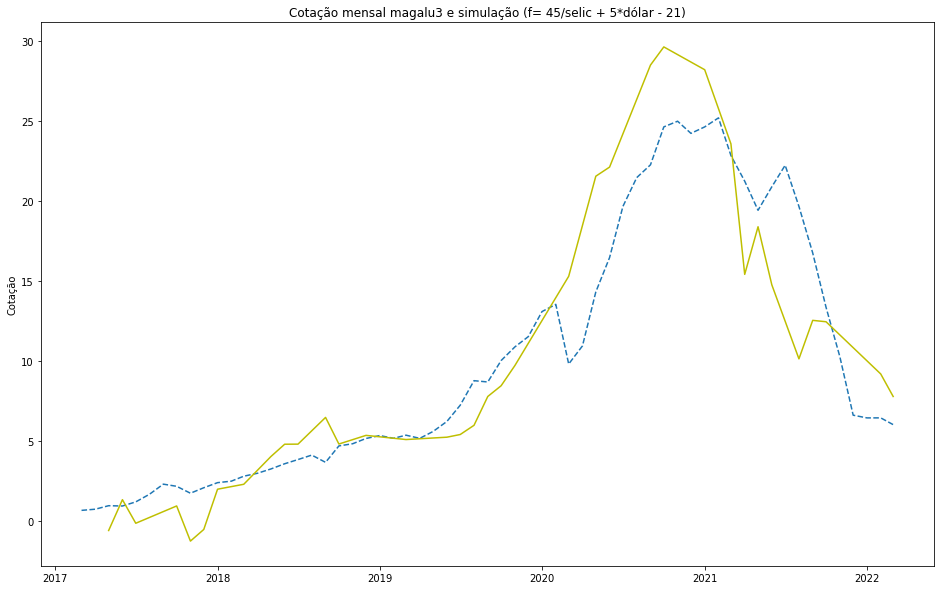

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['MAGALU3'],ls='--')
sns.lineplot(x= df_magalu3_dolar_02.index,y=45/df_magalu3_dolar_02['SELIC']+5*df_magalu3_dolar_02['DOLAR']-21, color='y')
#sns.lineplot(x= df_magalu3_dolar_02.index,y=(2*df_magalu3_dolar_02['VOLUME MAGALU3']*df_magalu3_dolar_02['MAGALU3']/100000000), color='grey')
#sns.lineplot(x= df_magalu3_dolar_02.index,y=((2*df_magalu3_dolar_02['VOLUME MAGALU3']*df_magalu3_dolar_02['MAGALU3']/100000000)+(35/df_magalu3_dolar_02['SELIC']+6*df_magalu3_dolar_02['DOLAR']-23)/2), color='grey')
plt.ylabel('Cotação')
plt.title('Cotação mensal magalu3 e simulação (f= 45/selic + 5*dólar - 21)')

##Vamos agora tentar simular o preço da ação com os valores de taxa selic e dolar
###Estamos estudando o comportamento da função y=(a/selic)+b*dolar+c
    encontrar os parâmetros a e b que minimizam o erro entre as duas curvas
    erro= soma(magalu3(i)-y(i))
    chute inicial de a e b
    a=a0, b=b0
    calcular o erro inicial E0
    variar os parâmetros aleatoriamente
    
    a=a0+delta(a), b= b0+delta(b)
    calcular o erro Ef
    se E0-EF<0
    aceita o novo parâmetro a e b

77408.09426514905
506.8493413744791
[34.6] [7.5] [29.1]


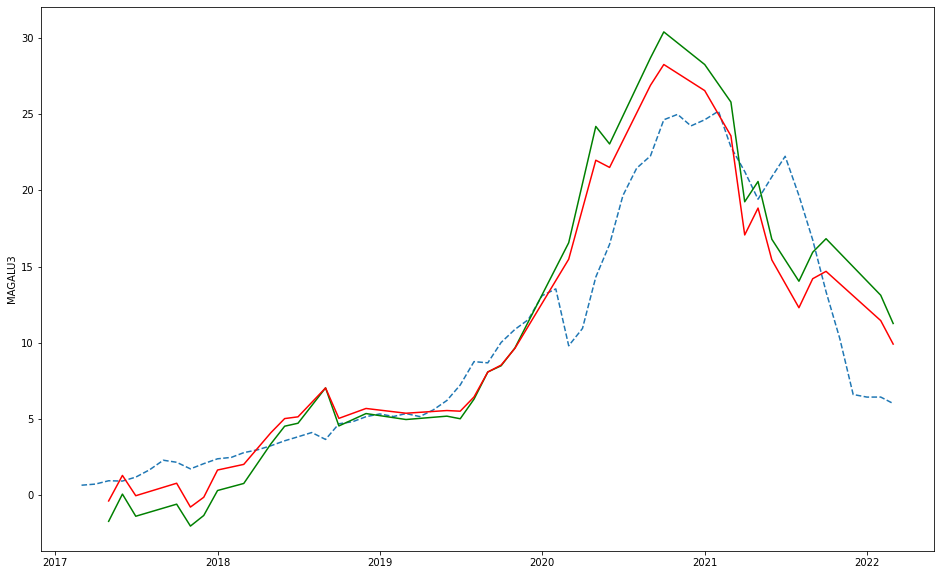

In [ ]:
import numpy as np
from IPython.display import display
rng = np.random.default_rng(12345)
a=a0=35
b=b0=6
c=c0=23
erro_inicial= pow((df_magalu3_dolar_02['MAGALU3']-((a0/df_magalu3_dolar_02['SELIC'])+(b0*df_magalu3_dolar_02['DOLAR'])+c0)),2).sum()
print(erro_inicial)
for i in range(10000):
  #Parametros do ajuste
  a=rng.integers(300,350,1)/10
  b=rng.integers(40,80,1)/10
  c=rng.integers(200,350,1)/10
  erro_final= pow((df_magalu3_dolar_02['MAGALU3']-((a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])-c)),2).sum()
  #sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['MAGALU3'],ls='--')
  #sns.lineplot(x= df_magalu3_dolar_02.index,y=(a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])+c, color='y')
  #clear_output(wait=True)
  #tomada de decisao
  #plt.show()
  if((erro_final - erro_inicial)<0):
    erro_inicial = erro_final
    a=a
    b=b
    c=c
print(erro_final)
print(a, b, c)
plt.figure(figsize=(16,10))
sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['MAGALU3'],ls='--')
sns.lineplot(x= df_magalu3_dolar_02.index,y=(a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])-c, color='g')
sns.lineplot(x= df_magalu3_dolar_02.index,y=(a0/df_magalu3_dolar_02['SELIC'])+(b0*df_magalu3_dolar_02['DOLAR'])-c0, color='r')


In [ ]:
sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['MAGALU3'],ls='--')
sns.lineplot(x= df_magalu3_dolar_02.index,y=(a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])+c, color='b')
sns.lineplot(x= df_magalu3_dolar_02.index,y=(a0/df_magalu3_dolar_02['SELIC'])+(b0*df_magalu3_dolar_02['DOLAR'])+c0-550, color='r')

In [ ]:
import numpy as np
from IPython.display import display
rng = np.random.default_rng(12345)
a=a0=40
b=b0=10
c=c0=60
#erro=[]
erro_inicial= pow((df_magalu3_dolar_02['MAGALU3']-((a0/df_magalu3_dolar_02['SELIC'])+(b0*df_magalu3_dolar_02['DOLAR'])+c0)).sum(),2)
print(erro_inicial)
#fig= plt.subplots(figsize=(16,10))
temperatura=100
f=np.exp(-(erro_final/temperatura))
for j in range(100):
  for i in range(100):
    #Parametros do ajuste
    a+=rng.integers(-10,10,1)
    b+=rng.integers(-10,10,1)
    b+=rng.integers(-2,2,1)
    erro_final= pow((df_magalu3_dolar_02['MAGALU3']-((a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])-c)).sum(),2)
    #sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['MAGALU3'],ls='--')
    #sns.lineplot(x= df_magalu3_dolar_02.index,y=(a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])+c, color='y')
    #clear_output(wait=True)
    #tomada de decisao
    #plt.show()
    if(erro_final - erro_inicial)<0:
      erro_inicial = erro_final
      a0=a
      b0=b
      c0=c
if(np.exp(-(erro_final/temperatura))-f)<0:
  f=np.exp(-(erro_final/temperatura))
temperatura-=1

sns.lineplot(x=df_magalu3_dolar_02.index,y=df_magalu3_dolar_02['MAGALU3'],ls='--')
sns.lineplot(x= df_magalu3_dolar_02.index,y=(a/df_magalu3_dolar_02['SELIC'])+(b*df_magalu3_dolar_02['DOLAR'])-c, color='r')
sns.lineplot(x= df_magalu3_dolar_02.index,y=(a0/df_magalu3_dolar_02['SELIC'])+(b0*df_magalu3_dolar_02['DOLAR'])-c0, color='r')

In [ ]:
soma_fun=df_magalu3_dolar_02['MAGALU3'].sum()
soma_fun

605.3766525183635